<a href="https://colab.research.google.com/github/NeoGregorio/CS-132-Group-35/blob/main/Group_35_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
# Load Data
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import nltk
import urllib
import datetime as dt
import scipy.stats as stats

dataset_url = "https://drive.google.com/file/d/1Bb3G5goi4CRAHZAJey7wGlgf_15Dx6iU/view?usp=sharing"
dataset_url = 'https://drive.google.com/uc?id=' + dataset_url.split('/')[-2]
df = pd.read_csv(dataset_url, header=0)
df

,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Quote Tweets,Views,Rating,Reasoning,Remarks,Add columns here,Add columns here.1,Add columns here.2,Reviewer,Review
0,35-1,12/03/23 16:01:45,https://twitter.com/up_kyla/status/15250434466...,35,Herminio L. Gregorio IV,AQNO,False claims about the validity and presidency...,"Marcos, 1986 Snap Election",@up_kyla,AlphaOneRene,...,0,NaN,FALSE,Marcos was persuaded to leave the country by a...,NaN,NaN,NaN,NaN,NaN,NaN
1,35-2,20/03/23 16:16:00,https://twitter.com/mlleahrb/status/1459139793...,35,James Daniel P. Ducay,AQNO,False claims about the validity and presidency...,EDSA Revolution fake news,@mlleahrb,𝓪𝓻𝓲𝓪𝓷𝓷𝓮 ♊❤️💚,...,0,NaN,MISLEADING,The EDSA revolution was led by the people to r...,This tweet quotes the tweet: https://twitter.c...,NaN,NaN,NaN,NaN,NaN
2,35-3,20/03/23 17:09:11,https://twitter.com/CLoveadore/status/15360689...,35,James Daniel P. Ducay,AQNO,False claims about the validity and presidency...,EDSA Revolution fake news,@CLoveadore,malditang lola,...,0,NaN,UNPROVEN,Although USA has a role during the EDSA revolu...,NaN,NaN,NaN,NaN,NaN,NaN
3,35-4,20/03/23 18:32:09,https://twitter.com/AntiPPropaganda/status/153...,35,James Daniel P. Ducay,AQNO,False claims about the validity and presidency...,EDSA Revolution fake news,@AntiPPropaganda,Anti Pink Propaganda,...,0,NaN,UNPROVEN,Although USA has a role during the EDSA revolu...,NaN,NaN,NaN,NaN,NaN,NaN
4,35-5,20/03/23 20:00:05,https://twitter.com/ThePaladin33/status/150937...,35,James Daniel P. Ducay,AQNO,False claims about the validity and presidency...,Cory Communist,@ThePaladin33,Sagittarius33,...,0,NaN,UNPROVEN,There were no proof that Cory convined with co...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,35-146,18/04/23 20:43:26,https://twitter.com/yap_dimaala/status/1451669...,35,Glenn Walter V. Lim,AQNO,False claims about the validity and presidency...,cory aquino trillion debt,@yap_dimaala,Maryam,...,0,NaN,FALSE,FALSE: National debt during Cory Aquino’s term...,This tweet is a reply to: https://twitter.com/...,NaN,NaN,NaN,NaN,NaN
146,35-147,18/04/23 20:57:20,https://twitter.com/grecoroman777/status/15021...,35,Glenn Walter V. Lim,AQNO,False claims about the validity and presidency...,"cory aquino 1 trillion, budget",@grecoroman777,Spartan,...,0,NaN,FALSE,FALSE: ‘NSO’ figures comparing spending budget...,NaN,NaN,NaN,NaN,NaN,NaN
147,35-148,18/04/23 21:00:02,https://twitter.com/AnyaRedlily/status/1524267...,35,Glenn Walter V. Lim,AQNO,False claims about the validity and presidency...,"cory aquino 1 trillion, budget",@AnyaRedlily,Anya,...,0,NaN,FALSE,FALSE: ‘NSO’ figures comparing spending budget...,This tweet is a reply to: https://twitter.com/...,NaN,NaN,NaN,NaN,NaN
148,35-149,18/04/23 21:03:47,https://twitter.com/smllslktnspt/status/149239...,35,Glenn Walter V. Lim,AQNO,False claims about the validity and presidency...,"cory aquino 1 trillion, budget",@smllslktnspt,Nvna,...,0,NaN,FALSE,FALSE: ‘NSO’ figures comparing spending budget...,This tweet is a reply to: https://twitter.com/...,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Preprocessing
# Remove useless and NaN columns
df_preprocessed = df.copy(deep=True).iloc[:, 0:29].drop(["Views","Group","Collector","Topic","Tweet Translated","Category","ID"],axis=1)
df_preprocessed.columns.values

array(['Timestamp', 'Tweet URL', 'Keywords', 'Account handle',
       'Account name', 'Account bio', 'Account type', 'Joined',
       'Following', 'Followers', 'Location', 'Tweet', 'Tweet Type',
       'Date posted', 'Screenshot', 'Content type', 'Likes', 'Replies',
       'Retweets', 'Quote Tweets', 'Rating', 'Reasoning'], dtype=object)

Mean Date Posted is 2021-04-14 02:09:15.200000 

Outliers in Terms of Date Posted: 

2016-04-21 04:53:44.911470
2016-02-09 13:02:12.089745
2016-04-18 17:04:45.914481
2016-04-18 17:05:46.115487


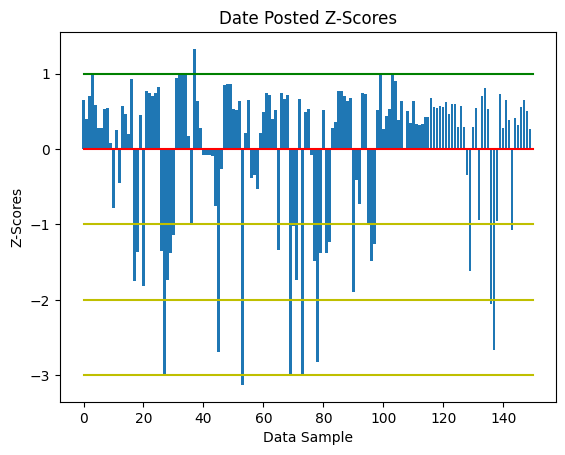

In [ ]:
# Date Posted Mean and Z-scores

mean_date = df_preprocessed["Date posted"].mean()
delta = dt.timedelta(mean_date)
reference_date = dt.datetime(1970, 1, 1)
result_date = reference_date + delta
print("Mean Date Posted is", result_date, "\n")

date_posted_zscores = stats.zscore(df_preprocessed["Date posted"] )

plt.bar(range(0,150), date_posted_zscores)
plt.xlabel("Data Sample")
plt.ylabel("Z-Scores")
plt.title("Date Posted Z-Scores")
plt.plot((0, 150), (1, 1), 'g-')        # 1 sd
plt.plot((0, 150), (0, 0), 'r-')        # mean
plt.plot((0, 150), (-1, -1), 'y-')      # -1 sd
plt.plot((0, 150), (-2, -2), 'y-')      # -1 sd
plt.plot((0, 150), (-3, -3), 'y-')      # -3 sd

# Handling Outliers: Handling using Boolean Marking to specify outliers
# In terms of the date posted, there are 4 outliers in the data set
date_posted_zscores = stats.zscore(df_preprocessed["Date posted"] )
std = (df_preprocessed["Date posted"]).std()

reference_date = dt.datetime(1970, 1, 1)
print("Outliers in Terms of Date Posted: \n")
for date in date_posted_zscores:
    if date <= -3 or date >= 3:
        back = (date * std) + mean_date
        delta = dt.timedelta(back)
        result_date = reference_date + delta
        print(result_date)
        

In [ ]:
mdates.date2num(dt.datetime.now())

19493.2792077936

In [ ]:
mdates.datestr2num(df_preprocessed["Joined"])

array([19410., 19436., 19527., 19499., 19406., 19558., 19674., 19380.,
       19615., 19681., 19465., 19583., 19558., 19520., 19436., 19644.,
       19706., 19524., 19487., 19706., 19403., 19583., 19559., 19527.,
       19487., 19369., 19486., 19427., 19495., 19556., 19435., 19410.,
       19433., 19651., 19683., 19407., 19487., 19400., 19438., 19436.,
       19458., 19708., 19708., 19708., 19493., 19487., 19547., 19497.,
       19407., 19530., 19706., 19468., 19612., 19461., 19558., 19426.,
       19558., 19456., 19707., 19408., 19651., 19410., 19682., 19649.,
       19462., 19585., 19436., 19620., 19469., 19671., 19618., 19583.,
       19520., 19675., 19646., 19673., 19467., 19580., 19609., 19671.,
       19404., 19433., 19376., 19647., 19428., 19712., 19406., 19368.,
       19677., 19438., 19645., 19589., 19710., 19409., 19651., 19434.,
       19433., 19435., 19409., 19470., 19590., 19370., 19620., 19377.,
       19621., 19651., 19619., 19679., 19712., 19678., 19619., 19678.,
      

In [ ]:
# Change dates to timestamps
df_preprocessed["Date posted"] = mdates.datestr2num(df_preprocessed["Date posted"])

# Remove Whitespace from Joined
df_preprocessed["Joined"] = [datestr.replace(" ", "") for datestr in df_preprocessed["Joined"]]

# Convert Tweet type column strings to all caps for uniform formatting
df_preprocessed["Tweet Type"] = df_preprocessed["Tweet Type"].str.upper()

# Lambda function that converts joined date to datetime and gets its difference from time now and converts it to days
x = lambda joined: (dt.datetime.now() - dt.datetime.strptime(joined, "%m/%y")).days
df_preprocessed["Joined"] = df_preprocessed["Joined"].apply(x)
df_preprocessed["Joined"]

# Ensuring formatting consistency

content_type = ["Rational", "Emotional", "Transactional"]
content_type_values = df_preprocessed["Content type"].tolist()
is_content_type_consistent = all(value in content_type for value in content_type_values)
print(is_content_type_consistent)

account_type = ["Identified", "Anonymous", "Media"]
account_type_values = df_preprocessed["Account type"].tolist()
is_account_type_consistent = all(value in account_type for value in account_type_values)
print(is_account_type_consistent)

rating = ["FALSE", "MISLEADING", "NEED CONTEXT", "UNPROVEN"]
rating_values = df_preprocessed["Rating"].tolist()
is_rating_consistent = all(value in rating for value in rating_values)
print(is_rating_consistent)

tweet_types = ["TEXT", "REPLY", "IMAGE", "VIDEO", "QUOTE TWEET", "URL"]
tweet_type = df_preprocessed["Tweet Type"].str.split(", ")
for value in tweet_type:
    for text in value:
        if text not in tweet_types:
            is_tweet_type_consistent = False
    is_tweet_type_consistent = True
print(is_tweet_type_consistent)

# Checking for duplicates

duplicates = df_preprocessed.duplicated()
if any(duplicates):
  result = True
else:
  result = False
print(result)

# Checking for duplicates

duplicates = df_preprocessed.duplicated()
if any(duplicates):
  with_duplicates = True
else:
  result = False
print(with_duplicates)

TypeError: ignored

To ensure formatting consistency of the columns Content type, Account type, and Rating, each of their respective coloumns are converted to a list via .tolist() function with each of its element compared to the values that are supposed to be in the specified coloumn. This is executed via the all() function which returns a boolean value. If the output is true, then there are no values in the column with an incorrect format, thus ensuring the consistency of the format.
On the other hand, nested for loops are used to check the consistency of the formatting of the Tweet Type column as each element contains multiple tweet types. 

The .duplicated function is also utilized to check if there are duplicates in the dataset.


In [ ]:
# Categorical Data Encoding

# One Hot Encoding

df_onehotencoded = df_preprocessed.copy(deep = True)

# Get One Hot Encoding for each Categorical Column
df_onehotencoded = pd.get_dummies(df_onehotencoded, prefix=['Account type'], columns = ['Account type'])
df_onehotencoded = pd.get_dummies(df_onehotencoded, prefix=['Content type'], columns = ['Content type'])
df_onehotencoded = pd.get_dummies(df_onehotencoded, prefix=['Rating'], columns = ['Rating'])

df_onehotencoded


,Timestamp,Tweet URL,Keywords,Account handle,Account name,Account bio,Joined,Following,Followers,Location,...,Reasoning,Account type_Anonymous,Account type_Identified,Content type_Emotional,Content type_Rational,Content type_Transactional,Rating_FALSE,Rating_MISLEADING,Rating_NEED CONTEXT,Rating_UNPROVEN
0,12/03/23 16:01:45,https://twitter.com/up_kyla/status/15250434466...,"Marcos, 1986 Snap Election",@up_kyla,AlphaOneRene,fun loving,469,4887,3492,NaN,...,Marcos was persuaded to leave the country by a...,1,0,1,0,0,1,0,0,0
1,20/03/23 16:16:00,https://twitter.com/mlleahrb/status/1459139793...,EDSA Revolution fake news,@mlleahrb,𝓪𝓻𝓲𝓪𝓷𝓷𝓮 ♊❤️💚,Pro-Philippines 🇵🇭\n✨ 𝑺𝒊𝒎𝒑𝒍𝒚 𝒂 𝑩𝒂𝒅𝒂𝒔𝒔 𝑪𝒚𝒏𝒐𝒑𝒉𝒊𝒍...,1171,507,368,"Manila, Philippines",...,The EDSA revolution was led by the people to r...,1,0,1,0,0,0,1,0,0
2,20/03/23 17:09:11,https://twitter.com/CLoveadore/status/15360689...,EDSA Revolution fake news,@CLoveadore,malditang lola,Karma is a bitch when it hits you back. Defend...,1445,1131,701,NaN,...,Although USA has a role during the EDSA revolu...,1,0,0,1,0,0,0,0,1
3,20/03/23 18:32:09,https://twitter.com/AntiPPropaganda/status/153...,EDSA Revolution fake news,@AntiPPropaganda,Anti Pink Propaganda,Para sa Bayan 🇵🇭 I am against the monopoly of...,380,512,417,NaN,...,Although USA has a role during the EDSA revolu...,1,0,0,1,0,0,0,0,1
4,20/03/23 20:00:05,https://twitter.com/ThePaladin33/status/150937...,Cory Communist,@ThePaladin33,Sagittarius33,Cat lover,1930,1848,1748,NaN,...,There were no proof that Cory convined with co...,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,18/04/23 20:43:26,https://twitter.com/yap_dimaala/status/1451669...,cory aquino trillion debt,@yap_dimaala,Maryam,Padayon\nfuture🩺⚕️\nDI AKO TROLLS YAWA KA.,592,16,1,NaN,...,FALSE: National debt during Cory Aquino’s term...,1,0,0,1,0,1,0,0,0
146,18/04/23 20:57:20,https://twitter.com/grecoroman777/status/15021...,"cory aquino 1 trillion, budget",@grecoroman777,Spartan,"♎♏♐♋♒\nCatholic Heterosexual. Car buff, MMA pr...",622,109,406,Republic of the Philippines,...,FALSE: ‘NSO’ figures comparing spending budget...,1,0,0,1,0,1,0,0,0
147,18/04/23 21:00:02,https://twitter.com/AnyaRedlily/status/1524267...,"cory aquino 1 trillion, budget",@AnyaRedlily,Anya,𝒞𝒶𝓇ℴ,1749,1126,8,Northern Sky,...,FALSE: ‘NSO’ figures comparing spending budget...,1,0,0,1,0,1,0,0,0
148,18/04/23 21:03:47,https://twitter.com/smllslktnspt/status/149239...,"cory aquino 1 trillion, budget",@smllslktnspt,Nvna,NaN,1079,184,12,NaN,...,FALSE: ‘NSO’ figures comparing spending budget...,1,0,0,1,0,1,0,0,0


# NLP Preprocessing

In [ ]:
# NLP Preamble

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
df_NLP = df_preprocessed.copy(deep=True) # Create deep copy for NLP purposes

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


First we tokenize the tweets for easier processing later on

In [ ]:
# NLP Tokenization

tweets_tokenized = [nltk.word_tokenize(tweet) for tweet in df_NLP["Tweet"]] # Creates a list of lists with each list containing the tokenized version of the tweets

for token in tweets_tokenized[34]:
  print(token, end=' ')

Sige , I-fact check ninyo kung hindi totoo , mga ulalo . 😂😂😂😂 { Alt-text-image : CORY AQUINO IS THE REAL DICTATOR Upon her power grab , Cory : Set aside the 1973 Constitution RATIFIED by a majority of the people and instituted a “ Freedom Constitution ” penned SOLELY by her . REMOVED ALL ELECTED members of the Legislature ; REMOVED ALL ELECTED local officials and replaced them with her handpicked choices ; REMOVED ALL legally appointed Members of the SUPREME COURT ; BECOME A ONE-MAN LEGISLATURE making laws by herself ( for example , the Family Code ) } 

We also lowercase all tokens to make the dataset more consistent since uppercase in both English and Tagalog is usually uneeded information

In [ ]:
# NLP Lowercasing

x = lambda tokenlist : [x.lower() for x in tokenlist] # lambda function to lowercase each token in a list
tweets_lower = [x(tweet) for tweet in tweets_tokenized] # uses lambda function on entire list of data

for token in tweets_lower[34]:
  print(token, end=' ')

sige , i-fact check ninyo kung hindi totoo , mga ulalo . 😂😂😂😂 { alt-text-image : cory aquino is the real dictator upon her power grab , cory : set aside the 1973 constitution ratified by a majority of the people and instituted a “ freedom constitution ” penned solely by her . removed all elected members of the legislature ; removed all elected local officials and replaced them with her handpicked choices ; removed all legally appointed members of the supreme court ; become a one-man legislature making laws by herself ( for example , the family code ) } 

We remove all stop words from our tokens, stop words are words considered not valuable since they offer little to no information

In [ ]:
# Stop Word Removal

stops_en = set(nltk.corpus.stopwords.words('english')) # english stopwords
stops_tl = {word for word in urllib.request.urlopen("https://raw.githubusercontent.com/stopwords-iso/stopwords-tl/master/stopwords-tl.txt")} # filipino stopwords

x = lambda tokenlist : [x for x in tokenlist if x not in (stops_en | stops_tl)] # lambda function to remove stopwords from list of tokens
tweets_nostops = [x(tweet) for tweet in tweets_lower]

for token in tweets_nostops[34]:
    print(token, end=' ')

sige , i-fact check ninyo kung hindi totoo , mga ulalo . 😂😂😂😂 { alt-text-image : cory aquino real dictator upon power grab , cory : set aside 1973 constitution ratified majority people instituted “ freedom constitution ” penned solely . removed elected members legislature ; removed elected local officials replaced handpicked choices ; removed legally appointed members supreme court ; become one-man legislature making laws ( example , family code ) } 

We then move to stemming/lemmatization, both different techniques used to condense words down to their root, making it more usable in NLP

In [ ]:
# Stemming

ps = nltk.stem.snowball.PorterStemmer()

x = lambda tokenlist : [ps.stem(x) for x in tokenlist] # lambda function to stem each word in a list of tokens
tweets_stemmed = [x(tweet) for tweet in tweets_nostops]

for token in tweets_stemmed[34]:
    print(token, end=' ')

sige , i-fact check ninyo kung hindi totoo , mga ulalo . 😂😂😂😂 { alt-text-imag : cori aquino real dictat upon power grab , cori : set asid 1973 constitut ratifi major peopl institut “ freedom constitut ” pen sole . remov elect member legislatur ; remov elect local offici replac handpick choic ; remov legal appoint member suprem court ; becom one-man legislatur make law ( exampl , famili code ) } 

In [ ]:
# Lemmatizing

lemmatizer = nltk.stem.WordNetLemmatizer()

x = lambda tokenlist : [lemmatizer.lemmatize(x) for x in tokenlist] # lambda function to lemmatize each word in a list of tokens
tweets_lemmatized = [x(tweet) for tweet in tweets_nostops]

for token in tweets_lemmatized[34]:
    print(token, end=' ')

sige , i-fact check ninyo kung hindi totoo , mga ulalo . 😂😂😂😂 { alt-text-image : cory aquino real dictator upon power grab , cory : set aside 1973 constitution ratified majority people instituted “ freedom constitution ” penned solely . removed elected member legislature ; removed elected local official replaced handpicked choice ; removed legally appointed member supreme court ; become one-man legislature making law ( example , family code ) } 

# Data Visualization


Here we have a histogram depicting when our tweets have been posted:

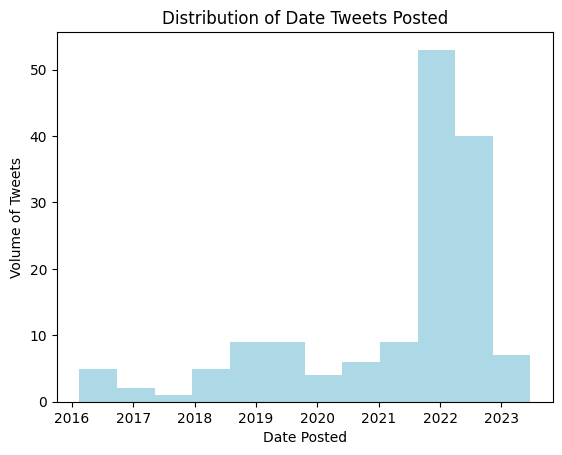

In [ ]:
# Plot tweet dates

fig, ax = plt.subplots(1,1)
ax.hist(df_preprocessed["Date posted"], bins=12, color='lightblue')
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

plt.xlabel("Date Posted")
plt.ylabel("Volume of Tweets")
plt.title("Distribution of Date Tweets Posted")
plt.show()

Plotting the respective election campaign intervals: 

2016: February 9 to May 7, 2016 (President, vice president, senators and party-lists)

2019: February 12 to May 11, 2019 (For senate and partylist candidates)

2022: February 8 to May 7, 2022 (President, vice president, senators and party-lists)





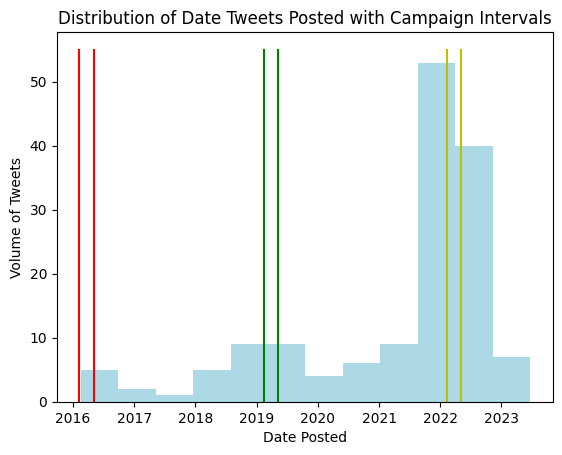

In [ ]:
# add campaign intervals
# 2016 Campaign: Red
# 2019 Campaign: Green
# 2022 Campaign: Yellow

fig, ax = plt.subplots(1,1)
ax.hist(df_preprocessed["Date posted"], bins=12, color='lightblue')
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

# 2016 Campaign: Red
interval1_1 = mdates.datestr2num(['02/09/16', '02/09/16'])
plt.plot(interval1_1 , (0,55), 'r-')
interval1_2 = mdates.datestr2num(['05/07/16', '05/07/16'])
plt.plot(interval1_2 , (0,55), 'r-')

# 2019 Campaign: Green
interval2_1 = mdates.datestr2num(['02/12/19', '02/12/19'])
plt.plot(interval2_1 , (0,55), 'g-')
interval2_2 = mdates.datestr2num(['05/11/19', '05/11/19'])
plt.plot(interval2_2 , (0,55), 'g-')

# 2022 Campaign: Yellow
interval3_1 = mdates.datestr2num(['02/08/22', '02/08/22'])
plt.plot(interval3_1 , (0,55), 'y-')
interval3_2 = mdates.datestr2num(['05/07/22', '05/07/22'])
plt.plot(interval3_2 , (0,55), 'y-')

plt.xlabel("Date Posted")
plt.ylabel("Volume of Tweets")
plt.title("Distribution of Date Tweets Posted with Campaign Intervals")
plt.show()


The **Red** interval is the 2016 Election Campaign, the **Green** interval is the 2019 Election Campaign, and the **Yellow** interval is the 2022 Election Campaign

Observing this plot, most tweets were found BEFORE the 2022 Presidential Election Campaign

**Additional Observation:** Plotting the date when President Ferdinand "Bongbong" Marcos and Leni Robredo filed for candidacy (October 6/7, 2021), we can see that many tweets were from around this time (Blue)

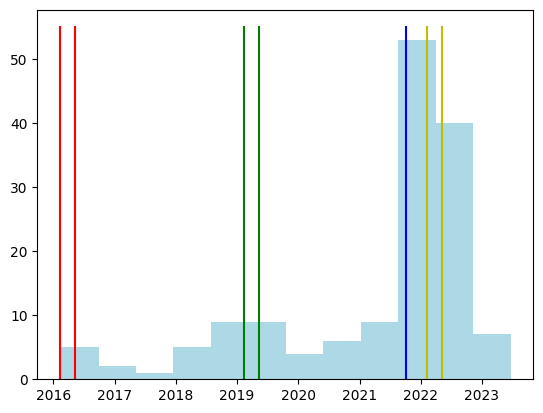

In [ ]:
# Plotting October 6, 2021

fig, ax = plt.subplots(1,1)
ax.hist(df_preprocessed["Date posted"], bins=12, color='lightblue')
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

interval1_1 = mdates.datestr2num(['02/09/16', '02/09/16'])
plt.plot(interval1_1 , (0,55), 'r-')
interval1_2 = mdates.datestr2num(['05/07/16', '05/07/16'])
plt.plot(interval1_2 , (0,55), 'r-')

interval2_1 = mdates.datestr2num(['02/12/19', '02/12/19'])
plt.plot(interval2_1 , (0,55), 'g-')
interval2_2 = mdates.datestr2num(['05/11/19', '05/11/19'])
plt.plot(interval2_2 , (0,55), 'g-')

interval3_1 = mdates.datestr2num(['02/08/22', '02/08/22'])
plt.plot(interval3_1 , (0,55), 'y-')
interval3_2 = mdates.datestr2num(['05/07/22', '05/07/22'])
plt.plot(interval3_2 , (0,55), 'y-')

leni_file = ['10/07/21','10/07/21']
plot_leni = mdates.datestr2num(['10/06/21','10/06/21'])
plt.plot(plot_leni , (0,55), 'b-')
plt.show()

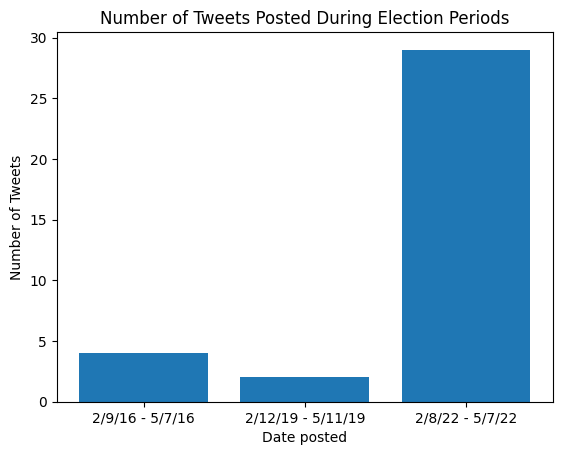

In [ ]:
# Plot Bar Graph for the number of tweets posted during the specified election dates

election_dates = [('2/9/16', '5/7/16'), ('2/12/19', '5/11/19'), ('2/8/22', '5/7/22')]
tweet_count_list = []

for start, end in election_dates:
  start = mdates.datestr2num(start)
  end = mdates.datestr2num(end)
  tweet_count = df_preprocessed.loc[(df_preprocessed["Date posted"] >= start) & (df_preprocessed["Date posted"] <= end)].shape[0]
  tweet_count_list.append(tweet_count)

plt.bar(range(len(election_dates)), tweet_count_list)
plt.xticks(range(len(election_dates)), [f'{start} - {end}' for start, end in election_dates])
plt.xlabel('Date posted')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Posted During Election Periods')
plt.show()

Bar plot is used for the data to visualize the number of tweets posted during the specified election periods as it shows the distribution of the said tweets and which range of dates has the most number of tweets.

The following is heatmaps that show the correlation between different variables in a tweet like Followers, Likes and etc. These visualize how connected different variables are to each other.

<Axes: >

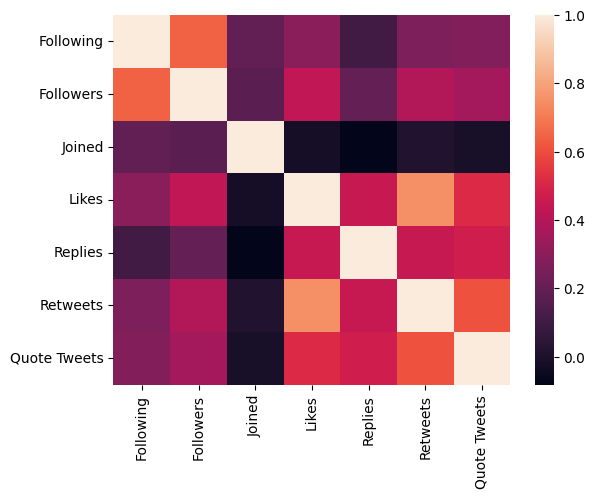

In [ ]:
# Plot Heat Map of Account Followers, Following, Age, and Interactions (Replies, Quote Tweets, Likes, Replies)


sns.heatmap(df_preprocessed.loc[:,["Following", "Followers", "Joined", "Likes", "Replies", "Retweets", "Quote Tweets"]].corr())

<Axes: >

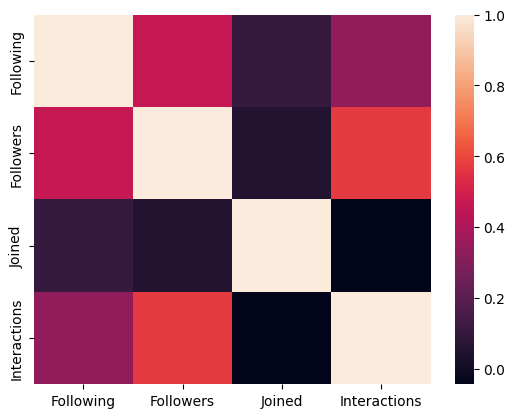

In [ ]:
# Plot Heat Map of Account Followers, Following, and Interactions (Replies, Quote Tweets, Likes, Replies) with Interactions summed up

df_interactions = df_preprocessed["Likes"] + df_preprocessed["Replies"] + df_preprocessed["Retweets"] + df_preprocessed["Quote Tweets"]
df_interactions.rename("Interactions", inplace=True)
sns.heatmap(pd.concat([df_preprocessed.loc[:,["Following", "Followers", "Joined"]], df_interactions],axis=1).corr())

#Data Frequency

The result shows that the the keyword **"cory aquino 1 trillion, budget"** is the most frequent keyword (39), followed by **"Fake EDSA Revolution"** (18), then **"Cory contractualization"** (11).

In [ ]:
freq = df_preprocessed["Keywords"].value_counts()
print(freq)

cory aquino 1 trillion, budget                 39
Fake EDSA Revolution                           18
Cory contractualization                        11
cory aquino trillion debt                      10
fake EDSA Revolution                            5
Bataan Nuclear Power Plant                      5
Marcos kidnapped                                5
Cory Aquino contractualization                  4
Cory Aquino, Power Grab                         3
Cory History books and marcos                   3
EDSA Revolution fake news                       3
Marcos, Kidnapped by USA                        3
Aquino, Communist Party of the Philippines.     3
EDSA fake                                       3
Cory Aquino and PAL                             3
Cory Communist                                  3
Cory Aquino                                     2
Cory Aquino on ofw                              2
Cory sold state-owned businesses                2
Marcos, 1986 Snap Election                      2


This result shows that the **Anonymous Account Type** composes most of the data set with 113 tweets.

In [ ]:
freq = df_preprocessed["Account type"].value_counts()
print(freq)

Anonymous     113
Identified     37
Name: Account type, dtype: int64


This result shows that most tweets in the dataset are from the Philippines. Further analysis shows that 42 tweets explicitly contain the word "Philippines." 

In [ ]:
freq = df_preprocessed["Location"].value_counts()
has_PH = df_preprocessed["Location"].str.contains("Philippines", case=False, na=False)
filtered_df = df[has_PH]["Location"].count()
print(freq)
print("\n Philippines:", filtered_df)


Philippines                                13
Manila, Philippines                         7
Republic of the Philippines                 4
Biñan City, Laguna                          2
Rizal, Philippines                          2
Davao, Philippines                          2
Singapore                                   2
Metro Manila, Philippines                   2
California, USA                             2
Cebu, Philippines                           2
Calabarzon, Philippines                     2
National Capital Region, Repub              2
Laguna, Philippines                         1
kingsville executive village                1
Cesspool                                    1
Dasmarinas, Calabarzon                      1
Maharlikang Pilipinas                       1
Bataan 🇵🇭                                   1
Lipa City, Batangas                         1
Dubai, United Arab Emirates                 1
Toronto, Ontario                            1
kapoya oy                         

This result shows that most of the tweets in the dataset are **Text, reply**

In [ ]:
freq = df_preprocessed["Tweet Type"].value_counts()
print(freq)


Text, reply                 44
Text                        42
Text, Reply                 27
Text, quote tweet           12
Text, image                 12
Text, URL                    3
Text, Image                  2
Text, Quote tweet            2
Text, reply, image           2
Text, image, URL             1
Text, video                  1
Text, reply, video           1
Text, photo, quote tweet     1
Name: Tweet Type, dtype: int64


This result shows that most of the tweets in the dataset are **Rational**


In [ ]:
freq = df_preprocessed["Content type"].value_counts()
print(freq)

Rational         136
Emotional         13
Transactional      1
Name: Content type, dtype: int64


This result shows that most of the tweets in the dataset are rated as **FALSE**

In [ ]:
freq = df_preprocessed["Rating"].value_counts()
print(freq)

FALSE           129
MISLEADING        9
NEED CONTEXT      9
UNPROVEN          3
Name: Rating, dtype: int64
